<a href="https://colab.research.google.com/github/yeb2Binfang/DS_GY_3001_CV/blob/main/HW/HW1/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 1: camera calibration

**Due date:** Feb 21st 2021

The goal of the assignment is to implement the linear calibration method described in Section 1.3.1 of this [book chapter](https://www.di.ens.fr/%7Eponce/introvis/sbook.pdf).


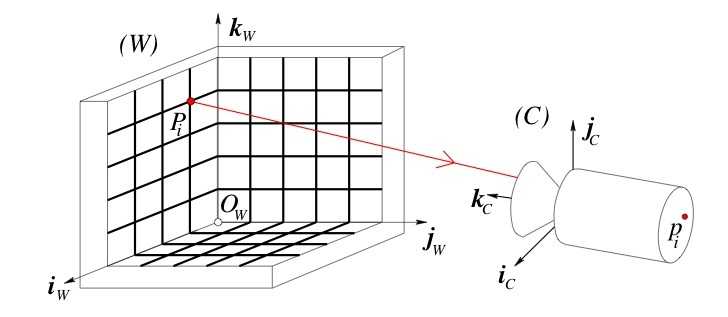


**Detailed instructions:** The `pts2d` array contains in its columns the (u,v) positions of the image data points (with, by convention, the u and v coordinates with origin at the bottom left of the image, u going right and v going up), while the `pts3d` array contains in its columns the (x,y,z) coordinate vectors of the corresponding 3D points in a right-handed coordinate system. The origin of the world coordinate system is supposed to be in front of the camera, with negative z value.

You should write functions that:
* Compute the 3x4 projection matrix  M estimated from these data using the linear least-squares method of Sec. 1.3.1.
* Compute the corresponding matrix K of intrinsic parameters using the method from M using the method described in the same section.
* Draw together the input image points and the projection of the 3D data points obtained using M to generate a figure like Fig. 1.18, and estimate the root-mean-sqared reprojection error.

You should also write short explanations describing your work and reporting your results.

In [37]:
import numpy as np
from numpy import linalg as LA

pts2d = np.loadtxt("https://raw.githubusercontent.com/yeb2Binfang/DS_GY_3001_CV/main/HW/HW1/pts2d.txt")
pts3d = np.loadtxt("https://raw.githubusercontent.com/yeb2Binfang/DS_GY_3001_CV/main/HW/HW1/pts3d.txt")

## explore the dataset

In [38]:
print(pts2d[0:5])
print(pts2d.shape)

[[399.8493559  543.68406782]
 [431.0183186  544.76791828]
 [460.30065796 545.7294486 ]
 [487.90472898 546.54199577]
 [513.9282144  547.26707113]]
(491, 2)


In [39]:
print(pts3d[0:5])
print(pts3d.shape)

[[15. 15.  0.]
 [30. 15.  0.]
 [45. 15.  0.]
 [60. 15.  0.]
 [75. 15.  0.]]
(491, 3)


## plot the data


In [40]:
import matplotlib.pyplot as plt

### pts2d graph

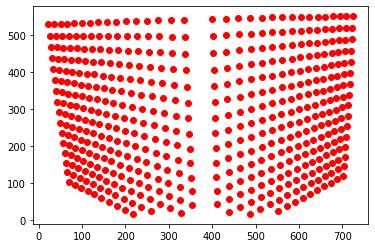

In [41]:
plt.scatter(pts2d[:,0],pts2d[:,1],marker='o',color='red')
plt.show()

### pts3d graph

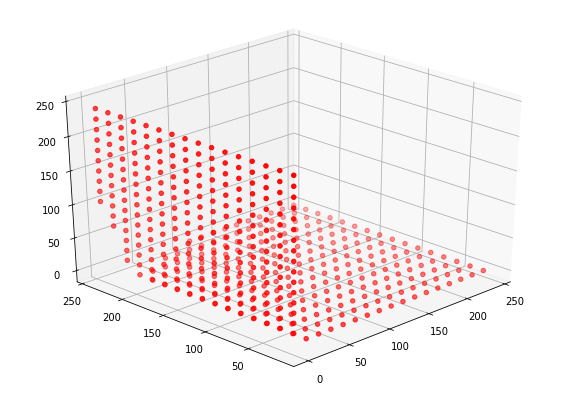

In [42]:
from mpl_toolkits import mplot3d
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(pts3d[:,0], pts3d[:,1], pts3d[:,2], marker='o', color = "red")
ax.view_init(30,225)
# show plot
plt.show()


## compute the projection matrix M

### construct 𝒫

Let P(pts3d) in homogeneous coordinate, it will become [X,Y,Z,1], we can use the below code the construct the homogeneous coordiate pts3d points.

In [43]:
rows = pts3d.shape[0]
one = np.ones((rows,1))
Homo_pts3d = np.append(pts3d,one,axis=1)
Homo_pts2d = np.append(pts2d,one,axis=1)

We want to find the projection matrix which is M. We decompose M into 3 m which are $m_1,m_2,m_3$ represented 3 rwows. According to the pinhole perspective equation, we can get the formula 
$\begin{cases}
x_i=\frac{m_1(ξ)·P_i}{m_3(ξ)·P_i}\\
y_i=\frac{m_2(ξ)·P_i}{m_3(ξ)·P_i}
\end{cases}$ where ξ is the intrinsic and extrinsic parameters.

Then we can get the formula
$\begin{cases}
(m_1-x_im_3)·P_i=P_i^Tm_1+0^Tm_2-x_iP_i^Tm_3=0\\
(m_2-y_im_3)·P_i=0^Tm_1+P_i^Tm_2-y_iP_i^Tm_3=0
\end{cases}$

So if we stack these useing n data points, it will become 2n homogeneous linear equations 𝓅**m**=0 where 
$
𝓅 =\begin{pmatrix}
P_1^T \space 0^T \space -x_1P_1^T\\
0^T \space P_1^T \space -y_1P_1^T\\
... \space ... \space ...\\
P_n^T \space 0^T \space -x_nP_n^T\\
0^T \space P_n^T \space -y_nP_n^T\\
\end{pmatrix}$
and $\textbf{m}=\begin{pmatrix}
\textbf{m}_1\\
\textbf{m}_2\\
\textbf{m}_3
\end{pmatrix}=0$

In this HW, there are 491 points which will construct 𝓅 to 982 * 12 matrix because M is 3x4 matrix which has 12 coefficients with 11 parameters. And M is the projection matrix which we want to compute. 

So the matrix format will be

$𝓅\textbf{m}=\begin{pmatrix}
X_1\space Y_1\space Z_1\space 1\space 0\space 0 \space 0 \space 0 \space -x_1*X_1\space -x_1*Y_1\space -x_1*Z_i\space -x_1*1\\
0\space 0 \space 0 \space 0 \space X_1\space Y_1\space Z_1\space 1\space  -y_1*X_1\space -y_1*Y_1\space -y_1*Z_1\space -y_1*1\\
...\\
X_{491}\space Y_{491}\space Z_{491}\space 1\space 0\space 0 \space 0 \space 0 \space -x_{491}*X_{491}\space -x_{491}*Y_{491}\space -x_{491}*Z_{491}\space -x_{491}*1\\
0\space 0 \space 0 \space 0 \space X_{491}\space Y_{491}\space Z_{491}\space 1\space  -y_{491}*X_1{491}\space -y_{491}*Y_{491}\space -y_{491}*Z_{491}\space -y_{491}*1\\
\end{pmatrix}$·
$
\begin{pmatrix}
m_{00}\\
m_{01}\\
m_{02}\\
m_{03}\\
m_{10}\\
m_{11}\\
m_{12}\\
m_{13}\\
m_{20}\\
m_{21}\\
m_{22}\\
m_{23}
\end{pmatrix}
$=0




In [44]:
def construct_p(pts2d,pts3d):
  rows = pts3d.shape[0]
  p = np.zeros((2*rows,12))
  for i in range(2*rows):
    if i%2==0:
      index = int(i/2)
      x = pts2d[index][0]
      y = pts2d[index][1]
      ##construct first part
      p[i][0] = pts3d[index][0]
      p[i][1] = pts3d[index][1]
      p[i][2] = pts3d[index][2]
      p[i][3] = 1

      p[i][4] = p[i][5] = p[i][6] = p[i][7] = 0
      
      p[i][8] = -x*pts3d[index][0]
      p[i][9] = -x*pts3d[index][1]
      p[i][10] = -x*pts3d[index][2]
      p[i][11] = -x*1

      ## construct second part
      p[i+1][0] = p[i+1][1] = p[i+1][2] = p[i+1][3] = 0

      p[i+1][4] = pts3d[index][0]
      p[i+1][5] = pts3d[index][1]
      p[i+1][6] = pts3d[index][2]
      p[i+1][7] = 1

      p[i+1][8] = -y*pts3d[index][0]
      p[i+1][9] = -y*pts3d[index][1]
      p[i+1][10] = -y*pts3d[index][2]
      p[i+1][11] = -y*1

    else:
      pass
  return p

In [45]:
p = construct_p(pts2d,pts3d)

check p

In [46]:
print(p[0:4])

[[ 1.50000000e+01  1.50000000e+01  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.99774034e+03 -5.99774034e+03 -0.00000000e+00 -3.99849356e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.50000000e+01  1.50000000e+01  0.00000000e+00  1.00000000e+00
  -8.15526102e+03 -8.15526102e+03 -0.00000000e+00 -5.43684068e+02]
 [ 3.00000000e+01  1.50000000e+01  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.29305496e+04 -6.46527478e+03 -0.00000000e+00 -4.31018319e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.00000000e+01  1.50000000e+01  0.00000000e+00  1.00000000e+00
  -1.63430375e+04 -8.17151877e+03 -0.00000000e+00 -5.44767918e+02]]


Then we need to compute **m** which is the projection matirx. 𝓅**m**=0. If we just compute it, we will a unique solution which is [0,0,0,0,0,0,0,0,0,0,0,0]. Therefore, we have to constrain $||m||^2=1$ to minimize $||𝓅\textbf{m}||^2$. The way we can do is to decompose p with SVD. The v matrix will constrain  $||m||^2=1$ and because we need to minimize $||𝓅\textbf{m}||^2$ so that we will select the last row of v matirx we get from decompositon of 𝓅. The this $v_{last\space row}$ matrix is the M matrix (projection matirx) we want

### svd decomposes 𝓅

In [47]:
u, s, vh = np.linalg.svd(p, full_matrices=True)

### get the projection matrix

In [48]:
m=vh[11]

In [49]:
print(m.reshape((3,4)))

[[-4.53359881e-03 -5.65451256e-04  2.02849590e-03 -5.23179344e-01]
 [-1.84278426e-03  4.15975903e-03 -1.68779276e-03 -8.52192928e-01]
 [-3.25683227e-06 -1.13804182e-06 -3.35237791e-06 -1.43209220e-03]]


check if $||m||^2$ ==1 and check if $||𝓅\textbf{m}||^2$ is minimized.

In [50]:
pM = p.dot(m)
print("||m||^2 is: {0:1.4f}".format(LA.norm(m)**2))
print("||𝓅m||^2 is: {0:1.6f}".format(LA.norm(pM)**2))

||m||^2 is: 1.0000
||𝓅m||^2 is: 0.001863


In [51]:
M_matrix = m.reshape((3,4))

## estimate the intrinsic and extrinsic parameters

scale_factor_p=

## calculate the parameters


In [135]:
import math
def compute_in_ex_para():
  a_1 = M_matrix[0][0:3]
  a_2 = M_matrix[1][0:3]
  a_3 = M_matrix[2][0:3]

  ##compute the scale factor p
  scale_factor_p = 1/LA.norm(a_3)
  
  ##compute the r_3
  r_3 = scale_factor_p*a_3
  
  ##compute the x_0 and y_0
  x_0 = scale_factor_p**2*(a_1.dot(a_3))
  y_0 = scale_factor_p**2*(a_2.dot(a_3))
  
  ##compute cos_theta, alpha, and beita
  #cos_theta = (np.cross(a_1,a_3)).dot(np.cross(a_2,a_3))/(-(LA.norm(np.cross(a_1,a_3))*LA.norm(np.cross(a_2,a_3))))
  cos_theta = (np.cross(a_1,a_3)).dot((np.cross(a_2,a_3)))/(-LA.norm(np.cross(a_1,a_3))*LA.norm(np.cross(a_2,a_3)))
  radian = math.acos(cos_theta)
  theta = math.degrees(radian) 
  sin_theta = math.sin(radian)  

  alpha = scale_factor_p**2*LA.norm(np.cross(a_1,a_3))*sin_theta
  beita = scale_factor_p**2*LA.norm(np.cross(a_2,a_3))*sin_theta

  ##compute r_1 and r_2
  r_1 = scale_factor_p**2*sin_theta/beita * np.cross(a_2,a_3)
  r_2 = np.cross(r_3,r_1)
  
  ##compute the skew
  s = -alpha*(cos_theta/sin_theta)

  ##construct the K_matrix
  K = np.zeros((3,3))
  K[0][0] = alpha
  K[0][1] = s
  K[0][2] = x_0
  K[1][1] = beita
  K[1][2] = y_0
  K[2][2] = 1

  ## compute t
  b = np.zeros((3,))
  b[0] = M_matrix[0][3]
  b[1] = M_matrix[1][3]
  b[2] = M_matrix[2][3]
  t = scale_factor_p*np.linalg.inv(K).dot(b)

  ## [R t]
  R_t = np.zeros((3,4))
  for i in range(3):
    for j in range(4):
      if i==0:
        if j<=2:
          R_t[i][j] = r_1[j]
        else:
          R_t[i][j] = t[i]
      if i==1:
        if j<=2:
          R_t[i][j] = r_2[j]
        else:
          R_t[i][j] = t[i]
      if i==2:
        if j<=2:
          R_t[i][j] = r_3[j]
        else:
          R_t[i][j] = t[i]
  M_recovered = K.dot(R_t)
  return M_recovered

In [136]:
M_recovered = compute_in_ex_para()
print(M_recovered)

[[-4.38690926e+02  5.82774928e+01  9.40208990e+02  1.08758675e+05]
 [ 3.83078529e+02 -8.64731918e+02  3.50858852e+02  1.77154115e+05]
 [ 6.77031244e-01  2.36576467e-01  6.96893298e-01  2.97703746e+02]]


## recover the pts2d


In [126]:
print(M_matrix)

[[-4.53359881e-03 -5.65451256e-04  2.02849590e-03 -5.23179344e-01]
 [-1.84278426e-03  4.15975903e-03 -1.68779276e-03 -8.52192928e-01]
 [-3.25683227e-06 -1.13804182e-06 -3.35237791e-06 -1.43209220e-03]]


In [ ]:
m_recovered = K.dot(M_recovered)

In [ ]:
print(m)

[-4.53359881e-03 -5.65451256e-04  2.02849590e-03 -5.23179344e-01
 -1.84278426e-03  4.15975903e-03 -1.68779276e-03 -8.52192928e-01
 -3.25683227e-06 -1.13804182e-06 -3.35237791e-06 -1.43209220e-03]


## recovered the pts2d

In [ ]:
m_recovered.dot(Homo_pts3d[0])/t[2]/1.04603273

array([400.30638422, 545.68087316,   1.        ])

In [ ]:
Homo_pts2d[0]

array([399.8493559 , 543.68406782,   1.        ])

In [137]:
Homo_pts2d_recovered = np.zeros((rows,2))
for i in range(rows):
  h_2d = M_matrix.dot(Homo_pts3d[i])/t[2]
  h_2d = h_2d/h_2d[2]
  Homo_pts2d_recovered[i][0] = h_2d[0]
  Homo_pts2d_recovered[i][1] = h_2d[1]

In [138]:
print(M_recovered.dot(Homo_pts3d[0]))

[103052.47345515 169929.31399504    311.40786143]


In [139]:
print(Homo_pts2d[0:5])

[[399.8493559  543.68406782   1.        ]
 [431.0183186  544.76791828   1.        ]
 [460.30065796 545.7294486    1.        ]
 [487.90472898 546.54199577   1.        ]
 [513.9282144  547.26707113   1.        ]]


In [140]:
print(Homo_pts2d_recovered[0:5])

[[400.30638484 545.68087381]
 [431.62646329 546.31693182]
 [461.02883267 546.91404438]
 [488.68439119 547.47568216]
 [514.74431656 548.00491533]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


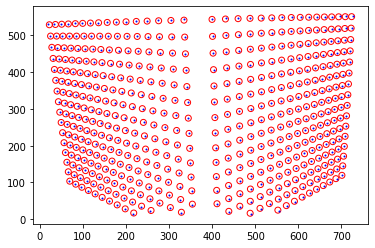

In [143]:
plt.scatter(pts2d[:,0],pts2d[:,1],marker='o',edgecolors='r',c='')
plt.scatter(Homo_pts2d_recovered[:,0],Homo_pts2d_recovered[:,1],marker='o',color='blue',s=1)
plt.show()

## compute the root square error


In [145]:
sum = 0
for i in range(rows):
  error = np.sqrt(((Homo_pts2d_recovered[i][0]-pts2d[i][0])**2)+(Homo_pts2d_recovered[i][1]-pts2d[i][1])**2)
  sum = sum + error
print(sum)
print(sum/rows)

419.7122623955937
0.8548111250419423
